# Wojciech Pragłowski

## Laboratorium 11 - klasyfikacja

### Zadanie 1

#### A

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

male=[(165, 60), (168, 65), (168, 64), (170, 67), (170, 70), (173, 67), 
      (173, 75), (178, 77), (178, 80), (180, 82), (180, 86), (180, 75), 
      (183, 78), (183, 86), (188, 79), (188, 90), (191, 92), (191, 87), 
      (195, 100), (195, 91), (195, 97), (198, 101)]

female=[(150, 42), (152, 41), (152, 45), (155, 47), (157, 48), (160, 52), 
        (160, 49), (163, 53), (163, 58), (168, 55), (168, 58), (170, 63), 
        (173, 64), (173, 68), (175, 61), (175, 68), (178, 65), (178, 70), 
        (180, 67), (180, 77), (183, 67), (183, 78)]

all_people = male+female
kolumny = ['Height', 'Weight']

people = pd.DataFrame(all_people, columns=kolumny)

mm = ['Male' for i in range(22)]
ff = ['Female' for i in range(22)]

class_names = mm+ff
people['Class'] = class_names

people

,Height,Weight,Class
0,165,60,Male
1,168,65,Male
2,168,64,Male
3,170,67,Male
4,170,70,Male
5,173,67,Male
6,173,75,Male
7,178,77,Male
8,178,80,Male
9,180,82,Male


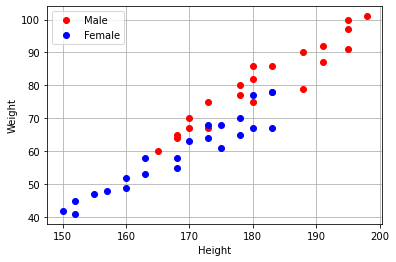

In [2]:
plt.plot(people.Height[people.Class == 'Male'], people.Weight[people.Class == 'Male'], 'ro', label='Male')
plt.plot(people.Height[people.Class == 'Female'], people.Weight[people.Class == 'Female'], 'bo', label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### B - naive Bayes

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

X = people.iloc[:, :-1].values
Y = people.iloc[:, 2].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred

array(['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female'], dtype='<U6')

In [6]:
for i,j in zip(Y_test, Y_pred):
    print('\nClass: ', i, '\nPrediciton: ', j)
    
print('\nError: ', np.mean(Y_pred != Y_test))


Class:  Female 
Prediciton:  Female

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Female

Class:  Female 
Prediciton:  Female

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Female 
Prediciton:  Female

Error:  0.1111111111111111


#### B - KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred

array(['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female'], dtype=object)

In [8]:
for i,j in zip(Y_test, Y_pred):
    print('\nClass: ', i, '\nPrediciton: ', j)
    
print('\nError: ', np.mean(Y_pred != Y_test))


Class:  Female 
Prediciton:  Female

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Female 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Male 
Prediciton:  Male

Class:  Female 
Prediciton:  Female

Error:  0.1111111111111111


Text(0, 0.5, 'Mean error')

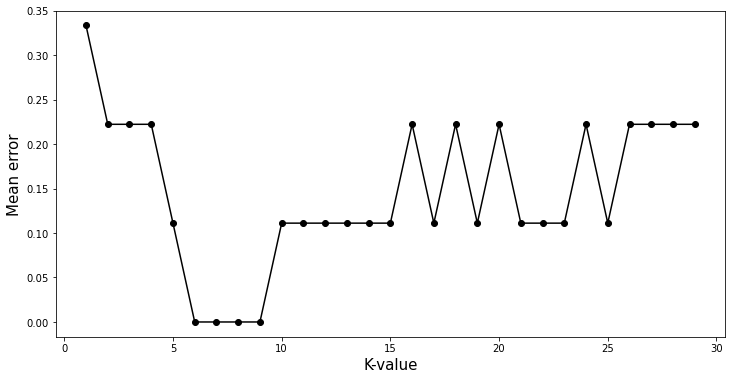

In [9]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 30), error, '-ok')
plt.xlabel('K-value', fontsize=15)
plt.ylabel('Mean error', fontsize=15)

### Zadanie 2

#### A

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


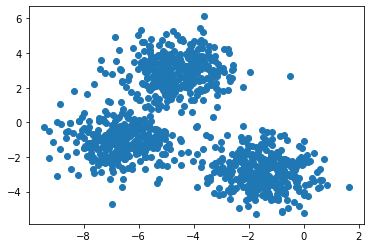

In [10]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=1000, centers=3, cluster_std=0.99, random_state=3042019)

df = pd.DataFrame(X, columns = ['f1', 'f2'])

plt.scatter(X[:,0], X[:,1])

#### B

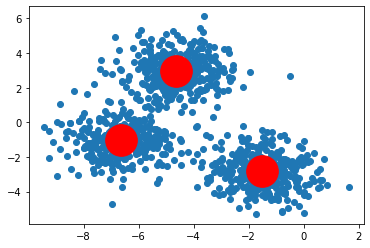

In [11]:
k_means = KMeans(n_clusters=3, max_iter=1000, n_init=10, random_state=3042019)
pred_y = k_means.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1], s=1000, c='red')
plt.show()

### Zadanie 3

#### Klasyfikator KNN z odległością Minkowskiego i metodą klasteringu

In [12]:
class KNN:
    def minkowski(v1, v2, m):
        distance = 0
        for i in range(len(v1)-1):
            distance+= abs(v2[i] - v1[i])**m
            distance = distance**(1/m)
        return distance
    
    def clustering(testSample, X, k, classes, m):
        #obliczenie odległosći
        distances = []
        for i in range(len(X)):
            distances.append(KNN.minkowski(testSample, X.iloc[i], m))
            
        #posortowanie
        distances = sorted(distances)
        
        #głosowanie
        for i in range(0, k-1, 1):
            classes[X.iloc[i].Class]+1
        #zwrócenie wyniku
        return max(classes, key = classes.get)

In [13]:
import random

# pomieszanie zbioru danych
def shuffle(X):
    for i in range(len(X)-1, 0, -1):
        j = random.randint(0, i)
        X.iloc[i], X.iloc[j] = X.iloc[j], X.iloc[i]
    return X

# podział zbioru na 80/20
def split_set(X):
    split = int(len(X)*0.8)
    train = X[:split]
    test = X[split:]
    return [train, test]

people_mixed = shuffle(people)
people_train, people_test = split_set(people_mixed)

print(people_test)

    Height  Weight   Class
35     180      77  Female
36     155      47  Female
37     180      82    Male
38     180      86    Male
39     170      67    Male
40     173      75    Male
41     173      67    Male
42     165      60    Male
43     173      64  Female


In [14]:
classes = {'Male':0, 'Female':0}
corrected = 0
m = 10
k = 30

# sprawdzenie czy wynik zgadza się z daną klasą
for i in range(len(people_test)):
    if KNN.clustering(people_test.iloc[i], people_train, k, classes, m) == people_test.iloc[i].Class:
        corrected += 1
accuracy = corrected/len(people_test)*100
print('Accuracy: ', round(accuracy, 2),'%')

Accuracy:  66.67 %
